# tsai

In [1]:
# # **************** UNCOMMENT AND RUN THIS CELL IF YOU NEED TO INSTALL/ UPGRADE TSAI ****************
stable = True # Set to True for latest pip version or False for main branch in GitHub
!pip install {"tsai -U" if stable else "git+https://github.com/timeseriesAI/tsai.git"} >> /dev/null

In [2]:
from tsai.all import *
computer_setup()

os             : Linux-5.4.188+-x86_64-with-Ubuntu-18.04-bionic
python         : 3.7.13
tsai           : 0.3.1
fastai         : 2.6.3
fastcore       : 1.4.4
torch          : 1.11.0+cu113
device         : 1 gpu (['Tesla P100-PCIE-16GB'])
cpu cores      : 4
RAM            : 25.46 GB
GPU memory     : [15.9] GB


# 데이터 불러오기

In [ ]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/AIBIZ/Data/v23/leaktype_train.csv')
test = pd.read_csv('/content/drive/MyDrive/AIBIZ/Data/v23/leaktype_test.csv')

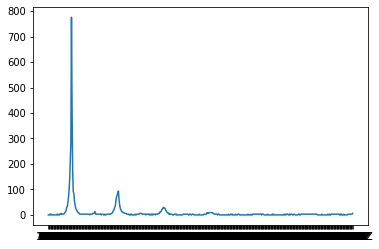

In [ ]:
import matplotlib.pyplot as plt
temp = train.drop('leaktype', axis=1)
plt.plot(temp.iloc[1])

In [ ]:
import collections
from collections import Counter
label_counts = collections.Counter(train['leaktype'])
print('Counts by label:', dict(label_counts))
print(f'Naive Accuracy: {100*max(label_counts.values())/sum(label_counts.values()):0.2f}%')

Counts by label: {'out': 1800, 'in': 1800, 'normal': 18000, 'other': 7000, 'noise': 5000}
Naive Accuracy: 53.57%


In [ ]:
# train 데이터 feature(X), target(y) 분리
X = train.drop('leaktype', axis=1)
y = train[['leaktype']]
display(X, y)

,0HZ,10HZ,20HZ,30HZ,40HZ,50HZ,60HZ,70HZ,80HZ,90HZ,...,5030HZ,5040HZ,5050HZ,5060HZ,5070HZ,5080HZ,5090HZ,5100HZ,5110HZ,5120HZ
0,0,2,2,0,2,0,2,2,2,2,...,2,5,2,2,5,2,2,5,2,5
1,0,0,0,3,0,3,0,0,0,0,...,0,3,3,3,3,3,3,3,3,6
2,0,4,4,4,4,5,4,4,5,5,...,5,5,6,5,6,6,6,5,6,4
3,0,6,5,5,6,5,6,6,5,5,...,6,6,7,7,5,6,5,5,7,7
4,0,3,0,0,3,0,0,3,3,3,...,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33595,0,5,6,6,23,15,7,10,15,16,...,8,7,7,7,7,7,6,7,6,7
33596,0,3,3,3,2,3,3,3,3,7,...,3,5,5,5,5,3,3,3,3,3
33597,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,3,0,0,3
33598,0,8,7,7,5,8,8,8,8,7,...,8,10,8,8,10,10,7,7,7,5


,leaktype
0,out
1,out
2,out
3,out
4,out
...,...
33595,noise
33596,noise
33597,noise
33598,noise


# ifft

In [ ]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/AIBIZ/Data/v23/leaktype_train.csv')
test = pd.read_csv('/content/drive/MyDrive/AIBIZ/Data/v23/leaktype_test.csv')

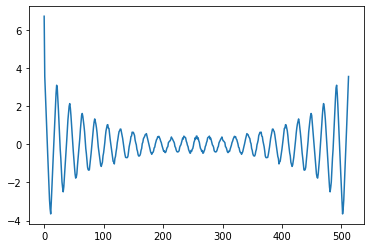

In [ ]:
X_tmp = train.drop('leaktype', axis=1)
X_tmp = np.array(X_tmp)

X_ifft = np.fft.ifft(X_tmp)
plt.plot(X_ifft[0])

In [ ]:
X_ifft = X_ifft.real
X_inv = pd.DataFrame(X_ifft)
X_inv

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,512
0,6.723197,3.561624,2.707740,1.884236,1.040136,0.273550,-0.565195,-1.338498,-2.145088,-2.909041,...,-3.379739,-2.909041,-2.145088,-1.338498,-0.565195,0.273550,1.040136,1.884236,2.707740,3.561624
1,8.984405,4.455612,1.710846,0.260431,-1.066644,-2.600036,-5.509427,-6.165960,-2.970326,-1.199653,...,-0.034648,-1.199653,-2.970326,-6.165960,-5.509427,-2.600036,-1.066644,0.260431,1.710846,4.455612
2,10.327485,4.314191,2.326266,0.057115,-1.711270,-2.929355,-3.218105,-2.751953,-1.770634,-0.669577,...,0.355560,-0.669577,-1.770634,-2.751953,-3.218105,-2.929355,-1.711270,0.057115,2.326266,4.314191
3,13.265107,-6.220146,7.132651,-5.354133,3.995386,-3.844817,1.891802,-2.430595,1.217212,-1.460584,...,1.008454,-1.460584,1.217212,-2.430595,1.891802,-3.844817,3.995386,-5.354133,7.132651,-6.220146
4,7.970760,4.547614,3.275575,1.975863,0.880931,-0.100297,-0.992489,-2.125377,-3.315900,-4.370681,...,-4.642712,-4.370681,-3.315900,-2.125377,-0.992489,-0.100297,0.880931,1.975863,3.275575,4.547614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33595,11.456140,4.364622,3.015975,0.845496,-0.802755,-2.413019,-3.351347,-3.285370,-2.643613,-1.247795,...,-0.301020,-1.247795,-2.643613,-3.285370,-3.351347,-2.413019,-0.802755,0.845496,3.015975,4.364622
33596,6.791423,2.904051,2.020523,1.163582,0.479128,-0.248143,-0.910141,-1.697930,-2.385597,-2.885061,...,-2.605963,-2.885061,-2.385597,-1.697930,-0.910141,-0.248143,0.479128,1.163582,2.020523,2.904051
33597,5.218324,3.850286,2.796113,1.665603,0.694871,-0.223927,-1.072028,-2.113923,-2.939710,-3.969320,...,-3.930189,-3.969320,-2.939710,-2.113923,-1.072028,-0.223927,0.694871,1.665603,2.796113,3.850286
33598,30.489279,-18.730260,14.031722,-11.676628,9.713875,-8.516330,7.257637,-6.497012,5.620159,-4.982636,...,4.456915,-4.982636,5.620159,-6.497012,7.257637,-8.516330,9.713875,-11.676628,14.031722,-18.730260


In [ ]:
concat_df = pd.concat([train, X_inv], axis=1)
#concat_df.to_csv('/content/drive/MyDrive/AIBIZ/Data/v23/leaktype_concat_ifft.csv') # 나중에 이 파일 불러와서 X, y만 나눠서 쓰기
concat_X = concat_df.drop('leaktype', axis=1)
concat_y = concat_df[['leaktype']]
display(concat_X, concat_y)

,0HZ,10HZ,20HZ,30HZ,40HZ,50HZ,60HZ,70HZ,80HZ,90HZ,...,503,504,505,506,507,508,509,510,511,512
0,0,2,2,0,2,0,2,2,2,2,...,-3.379739,-2.909041,-2.145088,-1.338498,-0.565195,0.273550,1.040136,1.884236,2.707740,3.561624
1,0,0,0,3,0,3,0,0,0,0,...,-0.034648,-1.199653,-2.970326,-6.165960,-5.509427,-2.600036,-1.066644,0.260431,1.710846,4.455612
2,0,4,4,4,4,5,4,4,5,5,...,0.355560,-0.669577,-1.770634,-2.751953,-3.218105,-2.929355,-1.711270,0.057115,2.326266,4.314191
3,0,6,5,5,6,5,6,6,5,5,...,1.008454,-1.460584,1.217212,-2.430595,1.891802,-3.844817,3.995386,-5.354133,7.132651,-6.220146
4,0,3,0,0,3,0,0,3,3,3,...,-4.642712,-4.370681,-3.315900,-2.125377,-0.992489,-0.100297,0.880931,1.975863,3.275575,4.547614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33595,0,5,6,6,23,15,7,10,15,16,...,-0.301020,-1.247795,-2.643613,-3.285370,-3.351347,-2.413019,-0.802755,0.845496,3.015975,4.364622
33596,0,3,3,3,2,3,3,3,3,7,...,-2.605963,-2.885061,-2.385597,-1.697930,-0.910141,-0.248143,0.479128,1.163582,2.020523,2.904051
33597,0,0,0,0,0,0,0,0,0,0,...,-3.930189,-3.969320,-2.939710,-2.113923,-1.072028,-0.223927,0.694871,1.665603,2.796113,3.850286
33598,0,8,7,7,5,8,8,8,8,7,...,4.456915,-4.982636,5.620159,-6.497012,7.257637,-8.516330,9.713875,-11.676628,14.031722,-18.730260


,leaktype
0,out
1,out
2,out
3,out
4,out
...,...
33595,noise
33596,noise
33597,noise
33598,noise


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data oversampling

In [ ]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/AIBIZ/Data/v23/leaktype_train.csv')
test = pd.read_csv('/content/drive/MyDrive/AIBIZ/Data/v23/leaktype_test.csv')

In [ ]:
import collections
from collections import Counter
label_counts = collections.Counter(train['leaktype'])
print('Counts by label:', dict(label_counts))
print(f'Naive Accuracy: {100*max(label_counts.values())/sum(label_counts.values()):0.2f}%')

In [ ]:
leak_out = train[train.leaktype=='out'] # 10배
leak_in = train[train.leaktype=='in'] # 10배
leak_noise = train[train.leaktype=='noise'] # 2.57
leak_other = train[train.leaktype=='other'] # 3.6

In [ ]:
# 단순 복제하여 oversampling
df_out = pd.concat([leak_out]*10, ignore_index=True)
df_in = pd.concat([leak_in]*10, ignore_index=True)
df_noise = pd.concat([leak_noise]*2, ignore_index=True)
df_other = pd.concat([leak_other]*3, ignore_index=True)

In [ ]:
train_over = pd.concat([train, df_out, df_in, df_noise, df_other], axis=0, ignore_index=True)
#train_over.to_csv('/content/drive/MyDrive/AIBIZ/Data/v23/leaktype_train_oversampled.csv') # 저장 후 불러와서 사용

# normalization

In [ ]:
# 전처리한 데이터 X, y 준비 후 #
########### TEMPLATE ############
# splits 생성
X, y = norm_X, y
model_name = ''
method_num = ''
splits = get_splits(y, valid_size=0.2, stratify=True, random_state=42, shuffle=True)
print(f'splits:{splits}')

# prepare dataloaders
tfms = [None, TSClassification()] # TSClassification == Categorize
batch_tfms = TSStandardize()
dls = get_ts_dls(X, y, splits=splits, tfms=tfms, batch_tfms=batch_tfms, bs=[64, 128])
print(f'dls.dataset:\n{dls.dataset}')
dls.show_batch(sharey=True) # 데이터 그래프로 보여줌
plt.show()

# build learner
model = build_ts_model(InceptionTimePlus, dls=dls) # model
learn = Learner(dls, model, metrics=accuracy)

# learning rate curve
learn.lr_find()

# train
learn = ts_learner(dls, metrics=accuracy, cbs=ShowGraph())
learn.fit_one_cycle(10, lr_max=1e-3)

# 모델 저장
PATH = Path(f'./models/{model_name}_{method_num}.pkl')
PATH.parent.mkdir(parents=True, exist_ok=True)
learn.export(PATH)

# visualize data
learn.show_results(sharey=True)
learn.show_probas()

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.most_confused(min_val=3)
interp.print_classification_report()

# create predictions
PATH = Path(f'./models/{model_name}_{method_num}.pkl')
learn_gpu = load_learner(PATH, cpu=False)
probas, _, preds = learn_gpu.get_X_preds(X[splits[0]])
print(preds[-10:])

In [ ]:
import pandas as pd
concat = pd.read_csv('/content/drive/MyDrive/AIBIZ/Data/v23/leaktype_concat_ifft.csv', index_col=0, header=0)
concat

,leaktype,0HZ,10HZ,20HZ,30HZ,40HZ,50HZ,60HZ,70HZ,80HZ,...,503,504,505,506,507,508,509,510,511,512
0,out,0,2,2,0,2,0,2,2,2,...,-3.379739,-2.909041,-2.145088,-1.338498,-0.565195,0.273550,1.040136,1.884236,2.707740,3.561624
1,out,0,0,0,3,0,3,0,0,0,...,-0.034648,-1.199653,-2.970326,-6.165960,-5.509427,-2.600036,-1.066644,0.260431,1.710846,4.455612
2,out,0,4,4,4,4,5,4,4,5,...,0.355560,-0.669577,-1.770634,-2.751953,-3.218105,-2.929355,-1.711270,0.057115,2.326266,4.314191
3,out,0,6,5,5,6,5,6,6,5,...,1.008454,-1.460584,1.217212,-2.430595,1.891802,-3.844817,3.995386,-5.354133,7.132651,-6.220146
4,out,0,3,0,0,3,0,0,3,3,...,-4.642712,-4.370681,-3.315900,-2.125377,-0.992489,-0.100297,0.880931,1.975863,3.275575,4.547614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33595,noise,0,5,6,6,23,15,7,10,15,...,-0.301020,-1.247795,-2.643613,-3.285370,-3.351347,-2.413019,-0.802755,0.845496,3.015975,4.364622
33596,noise,0,3,3,3,2,3,3,3,3,...,-2.605963,-2.885061,-2.385597,-1.697930,-0.910141,-0.248143,0.479128,1.163582,2.020523,2.904051
33597,noise,0,0,0,0,0,0,0,0,0,...,-3.930189,-3.969320,-2.939710,-2.113923,-1.072028,-0.223927,0.694871,1.665603,2.796113,3.850286
33598,noise,0,8,7,7,5,8,8,8,8,...,4.456915,-4.982636,5.620159,-6.497012,7.257637,-8.516330,9.713875,-11.676628,14.031722,-18.730260


## 방법1
- before: ifft 하기 전 원본 데이터
- after: ifft 한 후의 데이터

- before를 MinMaxScaler(feature_range = (after의 최소값, after의 최대값))로 정규화, after는 그대로 하여 training

In [ ]:
import pandas as pd
concat = pd.read_csv('/content/drive/MyDrive/AIBIZ/Data/v23/leaktype_concat_ifft.csv', index_col=0, header=0)
concat

In [ ]:
before = concat.iloc[:, :514].drop('leaktype', axis=1)
after = concat.iloc[:, 514:]
display(before.head(), after.head())

In [ ]:
min_a = after.describe().loc['min'].min()
max_a = after.describe().loc['max'].max()

min_b = before.describe().loc['min'].min()
max_b = before.describe().loc['max'].max()

print(f'min_a:{min_a}, max_a:{max_a}\nmin_b:{min_b}, max_b:{max_b}')

In [ ]:
# reshape(1, -1)한 상태로 scaling
before = np.array(before)
b_1d = before.reshape(1, -1)
b_1d.shape

In [ ]:
before.shape

In [8]:
#b_array = np.array(before)
#b = b_array.T

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(min_a, max_a))

In [ ]:
scaler = scaler.fit(b_1d.T)
normalized_b = scaler.transform(b_1d.T).T
normalized_b 

In [ ]:
norm_b = normalized_b.reshape((33600, 513))
norm_b

In [ ]:
df = pd.DataFrame(norm_b)
df

In [ ]:
norm_df = pd.concat([df, after], axis=1)
norm_df

In [ ]:
plt.plot(norm_df.iloc[2].values)

In [ ]:
norm_df.values

In [ ]:
norm_X = np.array(norm_df.values)
norm_X = to3d(norm_X) # 3-d array로 변경
norm_X.shape

In [ ]:
y = concat[['leaktype']]
y = np.array(y.leaktype)
y

### train

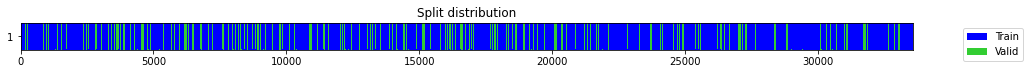

dls.dataset:
(#26880) [(TSTensor(vars:1, len:1026, device=cpu, dtype=torch.float32), TensorCategory(1)), (TSTensor(vars:1, len:1026, device=cpu, dtype=torch.float32), TensorCategory(0)), (TSTensor(vars:1, len:1026, device=cpu, dtype=torch.float32), TensorCategory(2)), (TSTensor(vars:1, len:1026, device=cpu, dtype=torch.float32), TensorCategory(3)), (TSTensor(vars:1, len:1026, device=cpu, dtype=torch.float32), TensorCategory(2)), (TSTensor(vars:1, len:1026, device=cpu, dtype=torch.float32), TensorCategory(0)), (TSTensor(vars:1, len:1026, device=cpu, dtype=torch.float32), TensorCategory(3)), (TSTensor(vars:1, len:1026, device=cpu, dtype=torch.float32), TensorCategory(2)), (TSTensor(vars:1, len:1026, device=cpu, dtype=torch.float32), TensorCategory(2)), (TSTensor(vars:1, len:1026, device=cpu, dtype=torch.float32), TensorCategory(2))] ...]


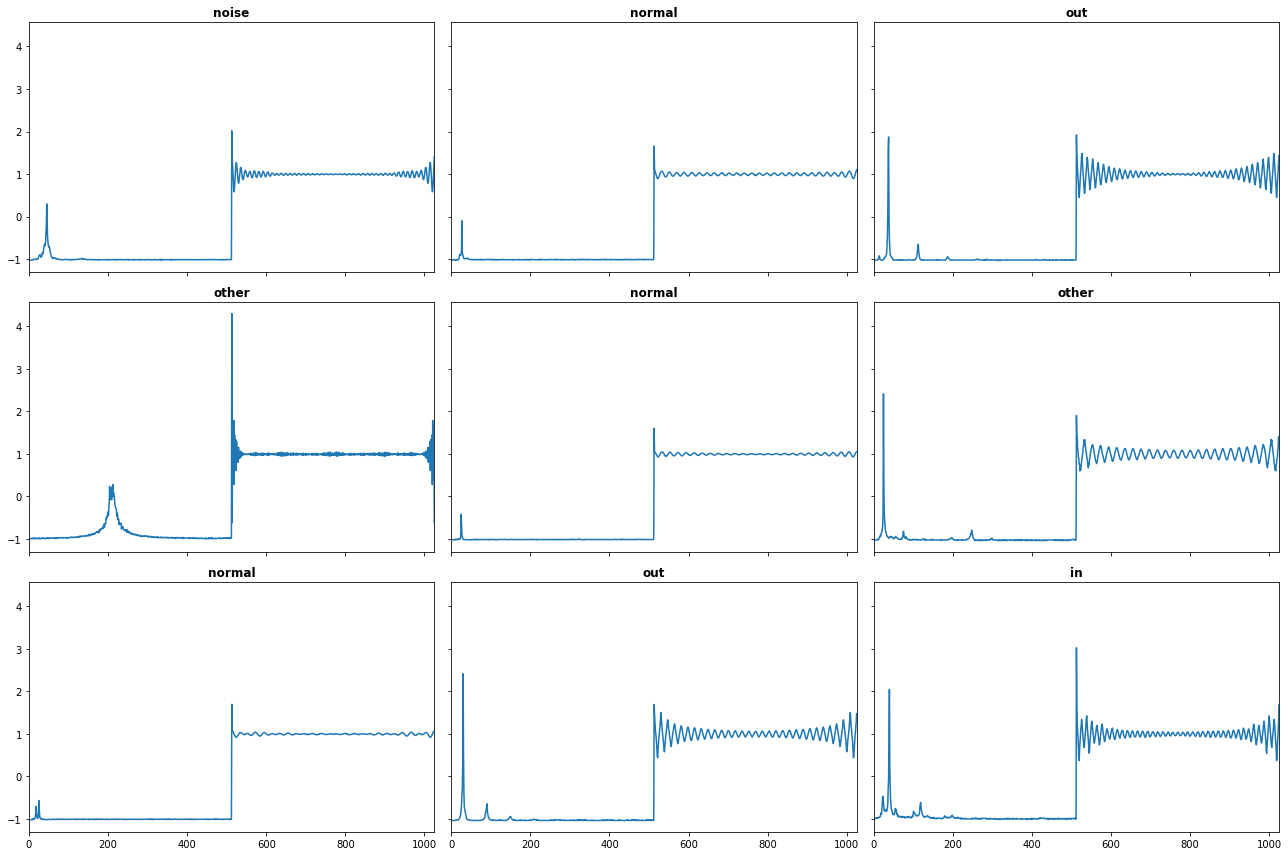

epoch,train_loss,valid_loss,accuracy,time
0,0.739915,0.967043,0.667113,00:26
1,0.745090,4.773882,0.540774,00:26
2,0.717881,1.246987,0.488542,00:26
3,0.708717,7.938524,0.189583,00:26
4,0.660155,1.073571,0.616815,00:26
5,0.638829,1.156950,0.650893,00:26
6,0.626022,0.711332,0.729167,00:26
7,0.600709,2.847422,0.222619,00:26
8,0.592095,0.596601,0.775446,00:26
9,0.578350,0.572324,0.773661,00:26


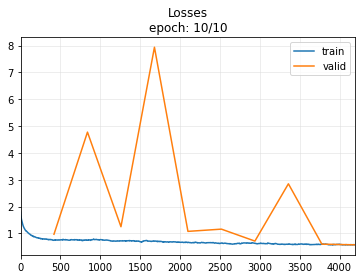

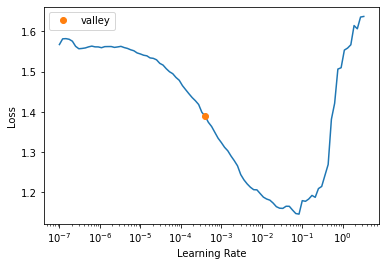

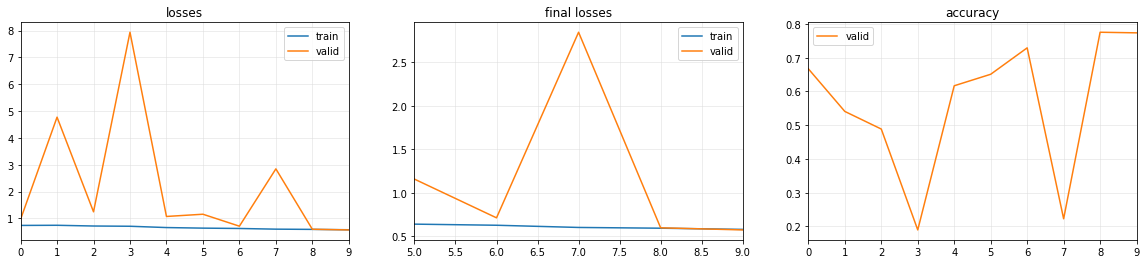

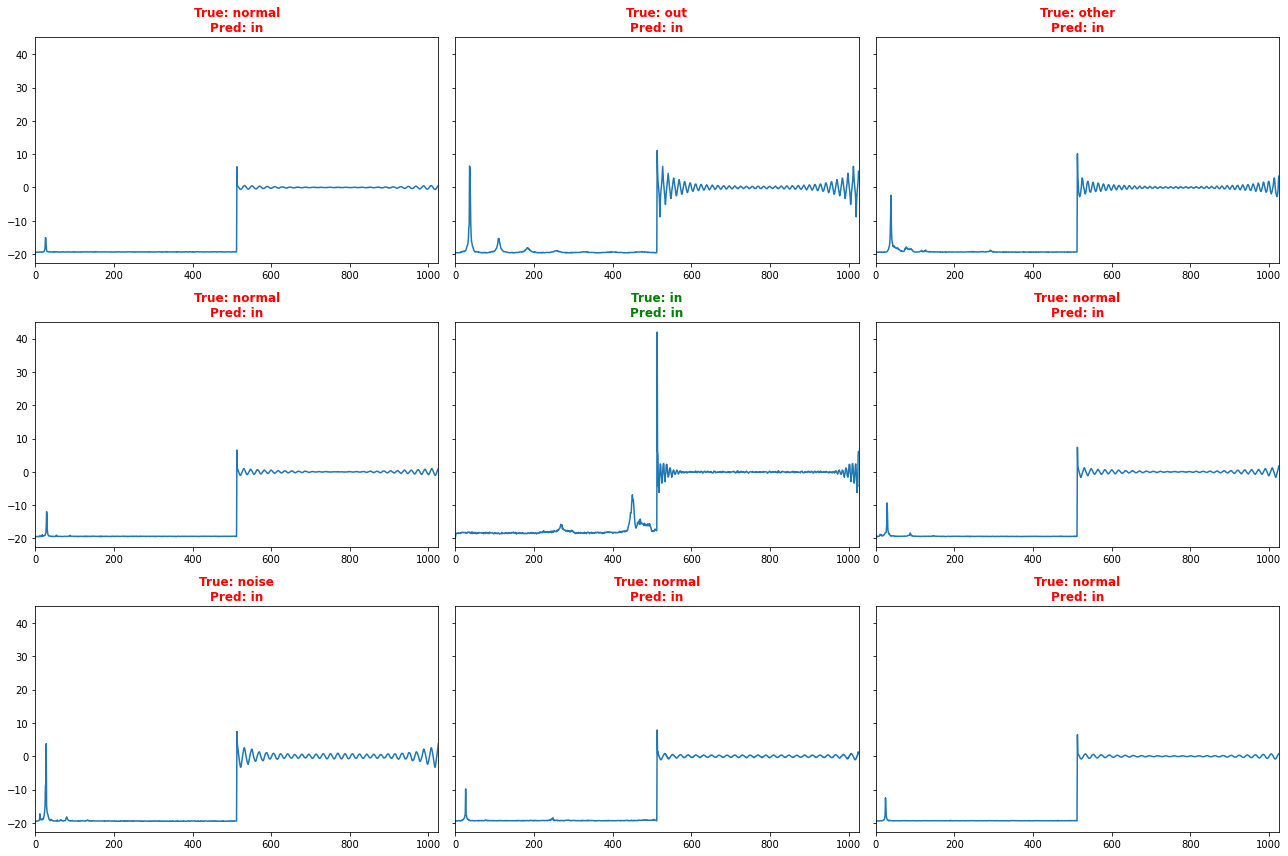

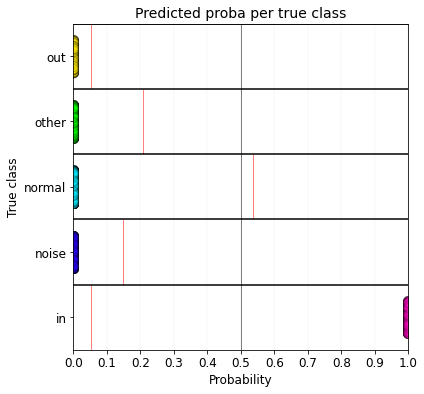

              precision    recall  f1-score   support

          in       0.05      1.00      0.10       360
       noise       0.00      0.00      0.00      1000
      normal       0.00      0.00      0.00      3600
       other       0.00      0.00      0.00      1400
         out       0.00      0.00      0.00       360

    accuracy                           0.05      6720
   macro avg       0.01      0.20      0.02      6720
weighted avg       0.00      0.05      0.01      6720



['normal' 'other' 'normal' 'normal' 'other' 'normal' 'noise' 'normal'
 'normal' 'other']


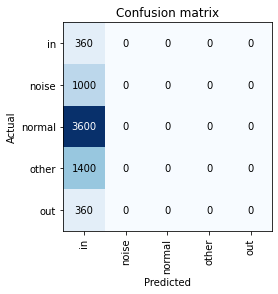

In [18]:
# 전처리한 데이터 X, y 준비 후 #
########### TEMPLATE ############
# splits 생성

#
X, y = norm_X, y
#
model_name = 'InceptionTimePlus'
method_num = '1'
#

splits = get_splits(y, valid_size=0.2, stratify=True, random_state=42, shuffle=True)
#print(f'splits:{splits}')

# prepare dataloaders
tfms = [None, TSClassification()] # TSClassification == Categorize
batch_tfms = TSStandardize()
dls = get_ts_dls(X, y, splits=splits, tfms=tfms, batch_tfms=batch_tfms, bs=[64, 128])
print(f'dls.dataset:\n{dls.dataset}')
dls.show_batch(sharey=True) # 데이터 그래프로 보여줌
plt.show()

# build learner
model = build_ts_model(InceptionTimePlus, dls=dls) # model
learn = Learner(dls, model, metrics=accuracy)

# learning rate curve
learn.lr_find()

# train
learn = ts_learner(dls, metrics=accuracy, cbs=ShowGraph())
learn.fit_one_cycle(10, lr_max=1e-3)

# 모델 저장
PATH = Path(f'./models/{model_name}_{method_num}.pkl')
PATH.parent.mkdir(parents=True, exist_ok=True)
learn.export(PATH)

# visualize data
learn.show_results(sharey=True)
learn.show_probas()

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.most_confused(min_val=3)
interp.print_classification_report()

# create predictions
PATH = Path(f'./models/{model_name}_{method_num}.pkl')
learn_gpu = load_learner(PATH, cpu=False)
probas, _, preds = learn_gpu.get_X_preds(X[splits[0]])
print(preds[-10:])

## 방법2
- before, after concat한 데이터 전체를 standardize

In [ ]:
import pandas as pd
concat = pd.read_csv('/content/drive/MyDrive/AIBIZ/Data/v23/leaktype_concat_ifft.csv', index_col=0, header=0)
concat_X = concat.drop('leaktype', axis=1)
concat_y = np.array(concat[['leaktype']].leaktype) # y 완료
display(concat_X, concat_y)

In [20]:
concat_X = np.array(concat_X)
concat_X = concat_X.reshape(1, -1)

In [ ]:
concat_X.shape

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = scaler.fit(concat_X.T) # 열 방향
normalized_X = scaler.transform(concat_X.T).T


In [ ]:
norm_X = normalized_X.reshape((33600, 1026))
norm_X = to3d(norm_X)
norm_X.shape

### before

In [1]:
import pandas as pd
import numpy as np

train = pd.read_csv('/content/drive/MyDrive/AIBIZ/Data/v23/leaktype_train.csv')
X = np.array(train.drop('leaktype', axis=1))
y = np.array(train.leaktype) # y완
print(y[:10])
print(X.shape)
X_1d = X.reshape(1, -1)
print(X_1d.shape)

['out' 'out' 'out' 'out' 'out' 'out' 'out' 'out' 'out' 'out']
(33600, 513)
(1, 17236800)


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = scaler.fit(X_1d.T)
normalized_X = scaler.transform(X_1d.T).T
norm_X = normalized_X.reshape((33600, 513))
norm_X = to3d(norm_X) # X완

### oversampled

In [7]:
import pandas as pd
import numpy as np

train = pd.read_csv('/content/drive/MyDrive/AIBIZ/Data/v23/leaktype_train_oversampled.csv', index_col=0, header=0)
X = np.array(train.drop('leaktype', axis=1))
y = np.array(train.leaktype) # y완
print(y[:10])
print(X.shape)
X_1d = X.reshape(1, -1)
print(X_1d.shape)

['out' 'out' 'out' 'out' 'out' 'out' 'out' 'out' 'out' 'out']
(100600, 513)
(1, 51607800)


In [5]:
X

array([[     0,      0,      2, ...,      5,      2,      5],
       [     1,      0,      0, ...,      3,      3,      6],
       [     2,      0,      4, ...,      5,      6,      4],
       ...,
       [100597,      0,      2, ...,      4,      4,      4],
       [100598,      0,      0, ...,      0,      0,      0],
       [100599,      0,      0, ...,      0,      0,      0]])

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = scaler.fit(X_1d.T)
normalized_X = scaler.transform(X_1d.T).T
norm_X = normalized_X.reshape((100600, 513))
norm_X = to3d(norm_X) # X완

### train

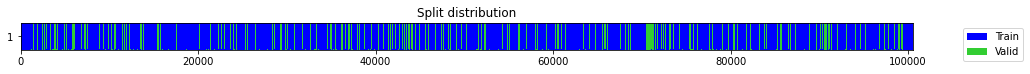

dls.dataset:
(#80480) [(TSTensor(vars:1, len:513, device=cpu, dtype=torch.float32), TensorCategory(2)), (TSTensor(vars:1, len:513, device=cpu, dtype=torch.float32), TensorCategory(3)), (TSTensor(vars:1, len:513, device=cpu, dtype=torch.float32), TensorCategory(4)), (TSTensor(vars:1, len:513, device=cpu, dtype=torch.float32), TensorCategory(4)), (TSTensor(vars:1, len:513, device=cpu, dtype=torch.float32), TensorCategory(0)), (TSTensor(vars:1, len:513, device=cpu, dtype=torch.float32), TensorCategory(4)), (TSTensor(vars:1, len:513, device=cpu, dtype=torch.float32), TensorCategory(0)), (TSTensor(vars:1, len:513, device=cpu, dtype=torch.float32), TensorCategory(1)), (TSTensor(vars:1, len:513, device=cpu, dtype=torch.float32), TensorCategory(0)), (TSTensor(vars:1, len:513, device=cpu, dtype=torch.float32), TensorCategory(3))] ...]


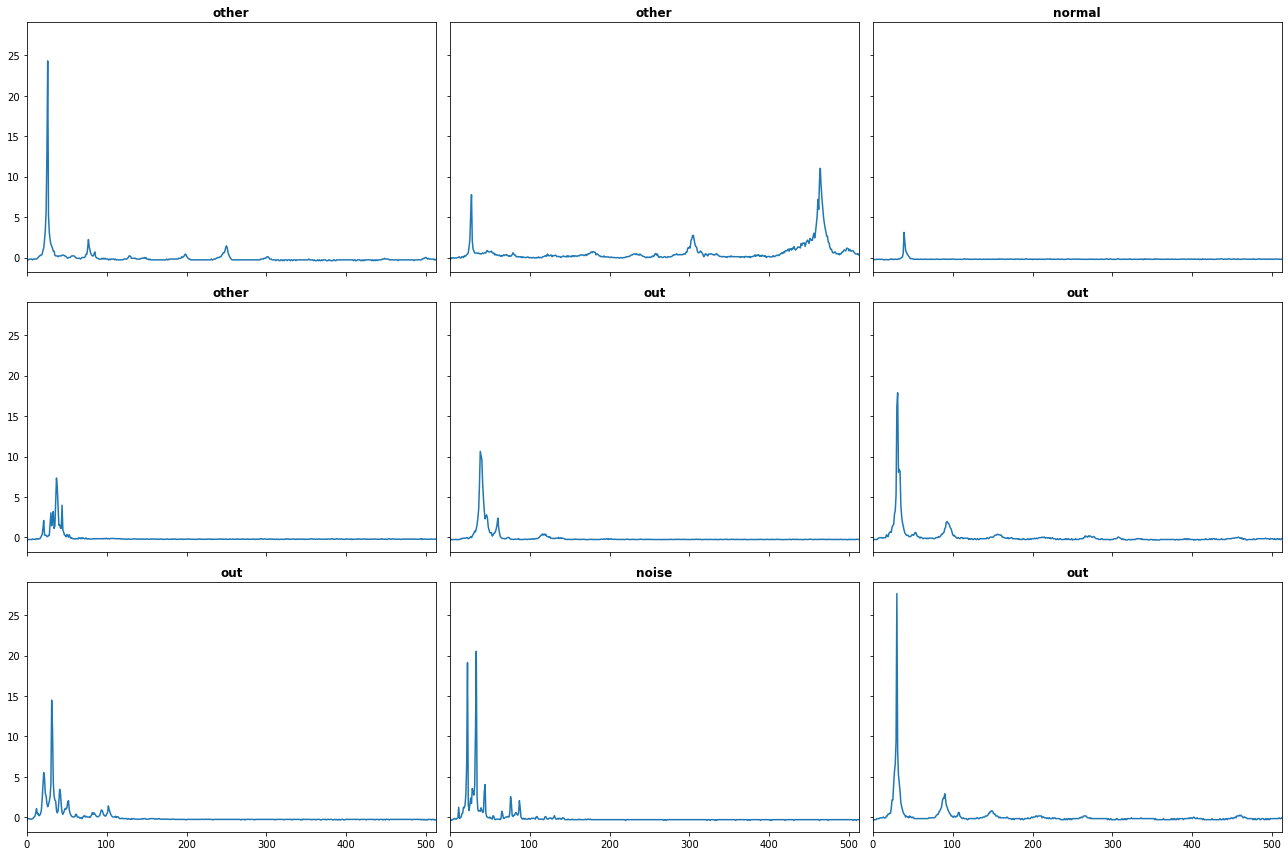

epoch,train_loss,valid_loss,accuracy,time
0,1.105709,1.125985,0.487376,00:57
1,0.990313,1.230986,0.487624,00:56
2,0.790988,0.885700,0.640358,00:52
3,0.560256,0.675949,0.747415,00:52
4,0.363431,0.394694,0.858748,00:52
5,0.217709,0.222071,0.922167,01:01
6,0.128661,0.124928,0.962177,00:52
7,0.068850,0.091365,0.970229,00:52
8,0.037241,0.037764,0.989563,00:52
9,0.030282,0.031966,0.991302,00:53


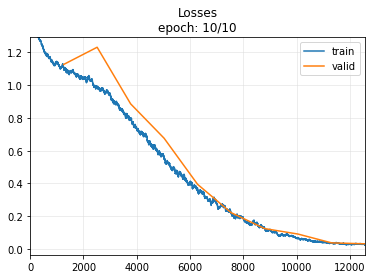

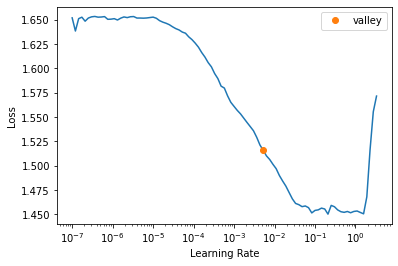

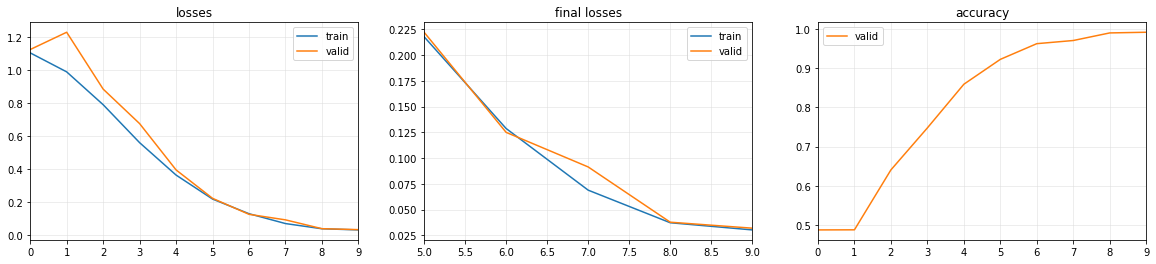

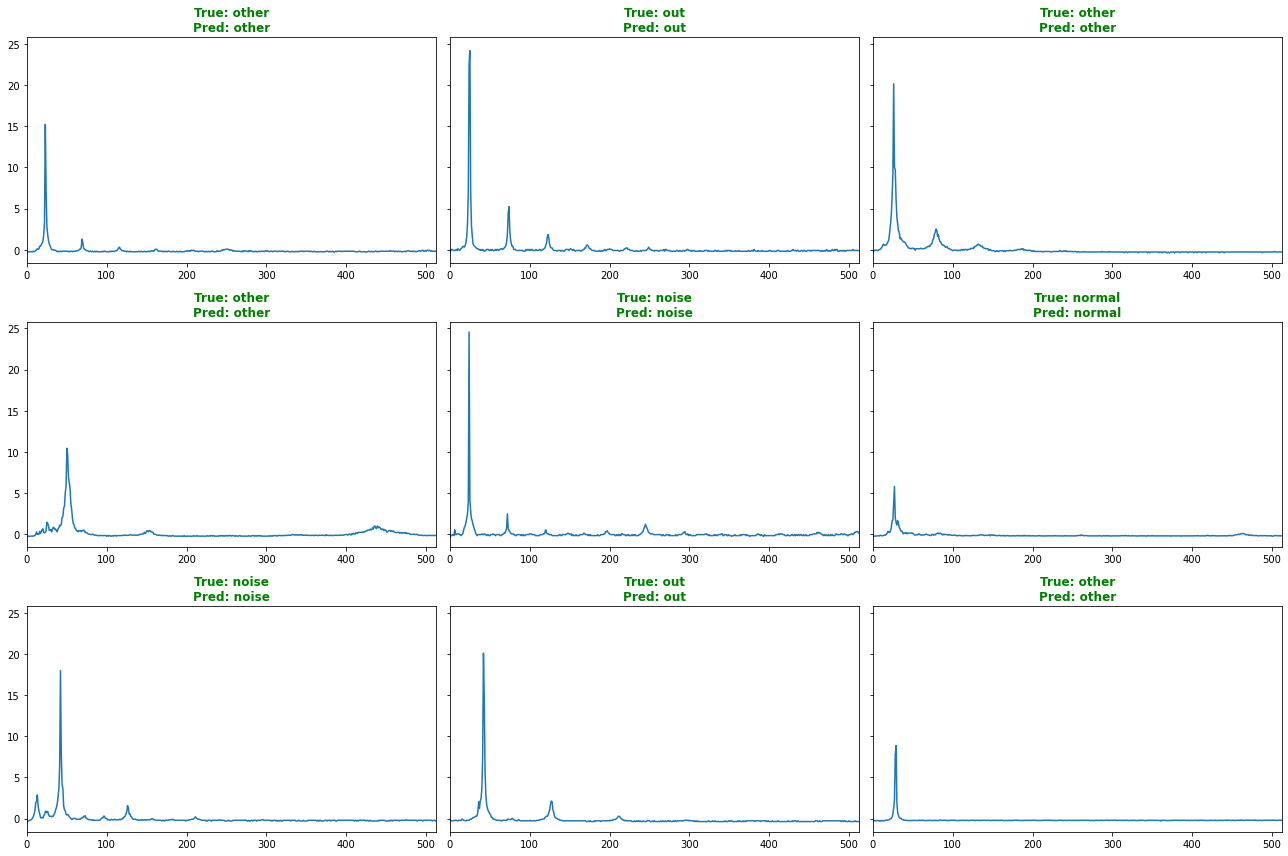

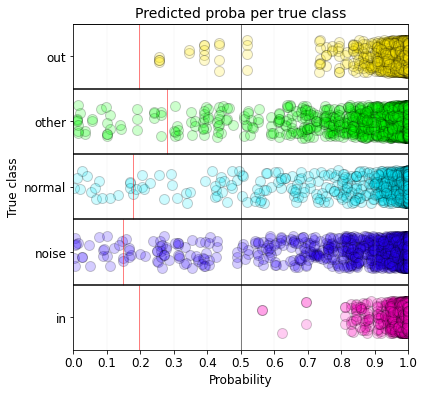

              precision    recall  f1-score   support

          in       1.00      1.00      1.00      3960
       noise       0.99      0.97      0.98      3000
      normal       0.98      0.99      0.99      3600
       other       0.99      0.99      0.99      5600
         out       1.00      1.00      1.00      3960

    accuracy                           0.99     20120
   macro avg       0.99      0.99      0.99     20120
weighted avg       0.99      0.99      0.99     20120



['out' 'in' 'other' 'other' 'other' 'noise' 'normal' 'other' 'other'
 'normal']


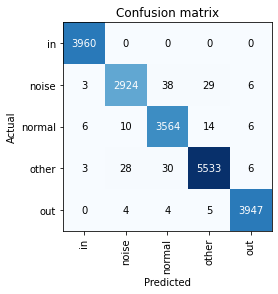

In [10]:
# 전처리한 데이터 X, y 준비 후 #
########### TEMPLATE ############
# splits 생성
#
X, y = norm_X, y
#
model_name = 'InceptionTimePlus'
method_num = '2'
#
splits = get_splits(y, valid_size=0.2, stratify=True, random_state=42, shuffle=True)
#print(f'splits:{splits}')

# prepare dataloaders
tfms = [None, TSClassification()] # TSClassification == Categorize
batch_tfms = TSStandardize()
dls = get_ts_dls(X, y, splits=splits, tfms=tfms, batch_tfms=batch_tfms, bs=[64, 128])
print(f'dls.dataset:\n{dls.dataset}')
dls.show_batch(sharey=True) # 데이터 그래프로 보여줌
plt.show()

# build learner
model = build_ts_model(InceptionTimePlus, dls=dls) # model
learn = Learner(dls, model, metrics=accuracy)

# learning rate curve
learn.lr_find()

# train
learn = ts_learner(dls, metrics=accuracy, cbs=ShowGraph())
learn.fit_one_cycle(10, lr_max=1e-3)

# 모델 저장
PATH = Path(f'./models/{model_name}_{method_num}.pkl')
PATH.parent.mkdir(parents=True, exist_ok=True)
learn.export(PATH)

# visualize data
learn.show_results(sharey=True)
learn.show_probas()

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.most_confused(min_val=3)
interp.print_classification_report()

# create predictions
PATH = Path(f'./models/{model_name}_{method_num}.pkl')
learn_gpu = load_learner(PATH, cpu=False)
probas, _, preds = learn_gpu.get_X_preds(X[splits[0]])
print(preds[-10:])

In [16]:
np.mean([1, 0.98, 0.99, 0.99, 1.00])


0.992

## 방법3
- before, after concat한 데이터 전체를 MinMaxScaling

In [ ]:
import pandas as pd
concat = pd.read_csv('/content/drive/MyDrive/AIBIZ/Data/v23/leaktype_concat_ifft.csv', index_col=0, header=0)
concat_X = concat.drop('leaktype', axis=1)
concat_y = np.array(concat[['leaktype']].leaktype) # y 완료
display(concat_X, concat_y)

In [ ]:
X = np.array(concat_X)
X.shape

In [ ]:
X = X.reshape(1, -1)
X.shape

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaler = scaler.fit(X.T)
norm_X = scaler.transform(X.T).T
#norm_X = to3d(norm_X) # x 완료

In [ ]:
norm_X = norm_X.reshape((33600, 1026))
norm_X.shape

In [30]:
norm_X = to3d(norm_X)

### oversampled

In [17]:
import pandas as pd
import numpy as np

train = pd.read_csv('/content/drive/MyDrive/AIBIZ/Data/v23/leaktype_train_oversampled.csv', index_col=0, header=0)
X = np.array(train.drop('leaktype', axis=1))
y = np.array(train.leaktype) # y완
print(y[:10])
print(X.shape)
X_1d = X.reshape(1, -1)
print(X_1d.shape)

['out' 'out' 'out' 'out' 'out' 'out' 'out' 'out' 'out' 'out']
(100600, 513)
(1, 51607800)


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler = scaler.fit(X_1d.T)
normalized_X = scaler.transform(X_1d.T).T
norm_X = normalized_X.reshape((100600, 513))
norm_X = to3d(norm_X) # X완

### before

In [20]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/AIBIZ/Data/v23/leaktype_train.csv')
X = np.array(train.drop('leaktype', axis=1))
y = np.array(train.leaktype) # y완
print(X.shape)
X_1d = X.reshape(1, -1)
print(X_1d.shape)

(33600, 513)
(1, 17236800)


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler = scaler.fit(X_1d.T)
normalized_X = scaler.transform(X_1d.T).T
norm_X = normalized_X.reshape((33600, 513))
norm_X = to3d(norm_X) # X완

### train

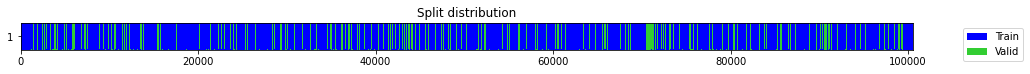

splits:([15660, 80830, 39592, 37827, 53414, 47529, 51734, 28619, 56476, 27106, 10235, 68635, 20249, 31664, 3174, 4057, 57434, 42951, 51878, 54385, 51280, 58298, 69908, 40963, 95135, 44728, 69503, 5828, 14285, 28048, 74726, 62693, 97740, 16734, 5850, 2772, 43601, 62708, 4189, 93551, 92971, 53604, 81699, 37467, 89812, 44774, 72413, 36619, 3514, 43524, 84300, 58265, 74501, 69559, 94102, 24714, 2084, 33289, 34522, 67950, 58145, 39542, 78505, 76887, 76446, 46329, 4811, 44821, 19751, 71181, 94615, 57464, 73253, 41769, 33211, 33132, 74359, 98382, 16521, 63136, 39108, 65499, 38040, 67820, 473, 31388, 34709, 30165, 79818, 8720, 66429, 59767, 70610, 37753, 28716, 44688, 44237, 14491, 48684, 13228, 73302, 10552, 14907, 82741, 68481, 84287, 3997, 24722, 65846, 68402, 89780, 89261, 23152, 69013, 100414, 13491, 22193, 11690, 5502, 33765, 94763, 66069, 19221, 54841, 48758, 93656, 3245, 56457, 282, 29750, 78341, 12546, 33925, 14939, 45822, 77346, 20144, 29799, 1703, 73495, 60639, 25573, 80880, 81577, 

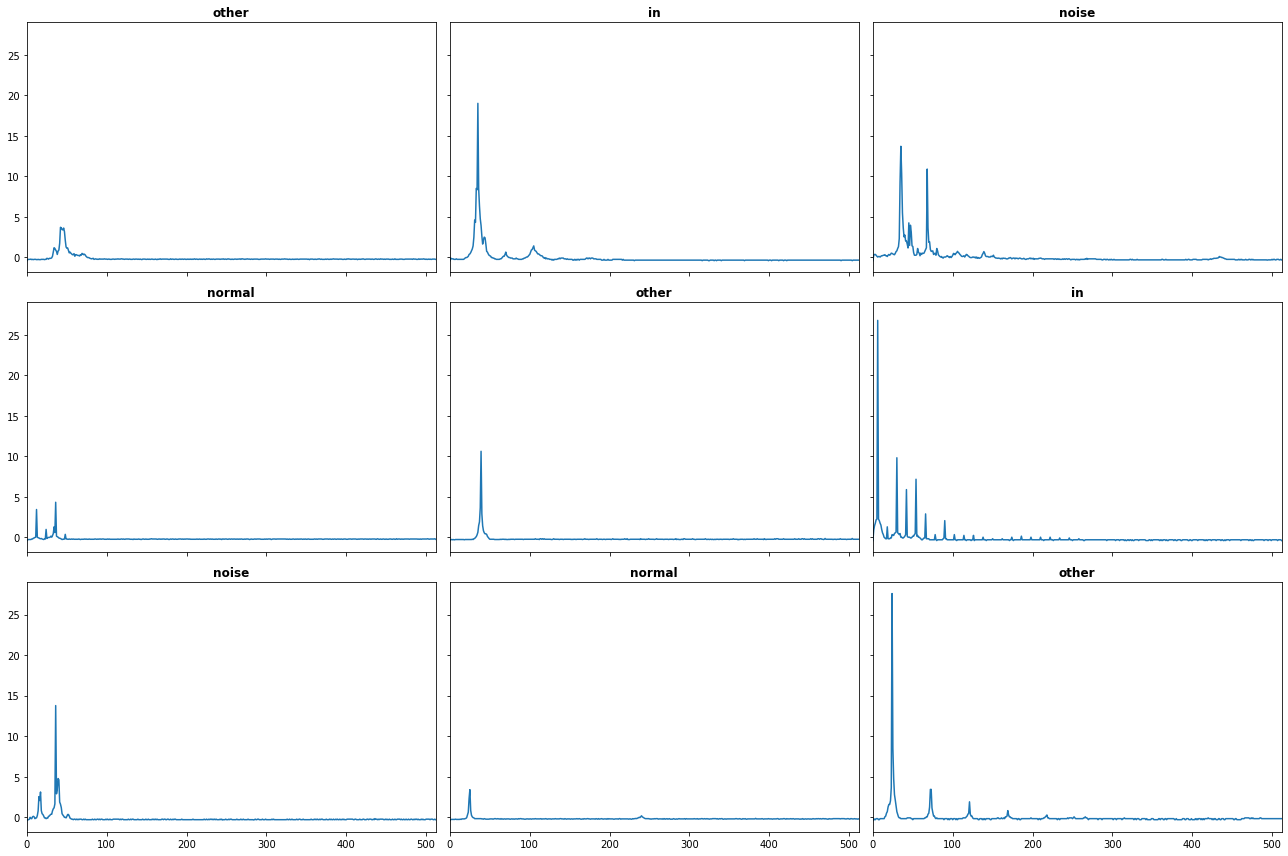

epoch,train_loss,valid_loss,accuracy,time
0,1.080218,1.140962,0.509841,00:53
1,0.957546,1.026658,0.558598,01:02
2,0.716427,0.803976,0.668439,00:57
3,0.472763,0.466562,0.828032,00:54
4,0.301663,0.344360,0.875497,00:53
5,0.203333,0.216788,0.923111,00:54
6,0.112151,0.154327,0.950298,00:53
7,0.054228,0.046816,0.986779,00:53
8,0.026327,0.025842,0.992942,00:53
9,0.018124,0.023863,0.992744,00:53


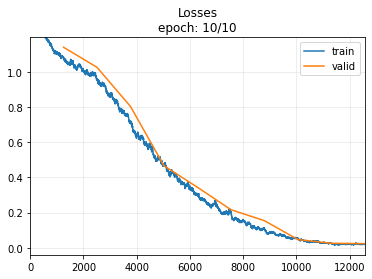

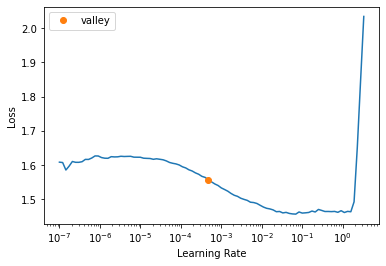

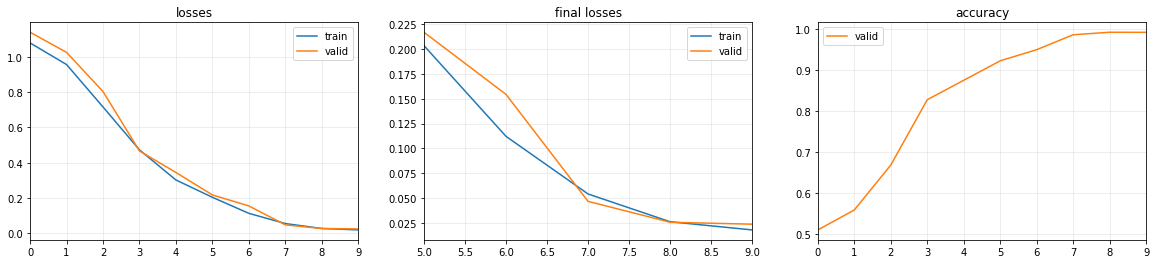

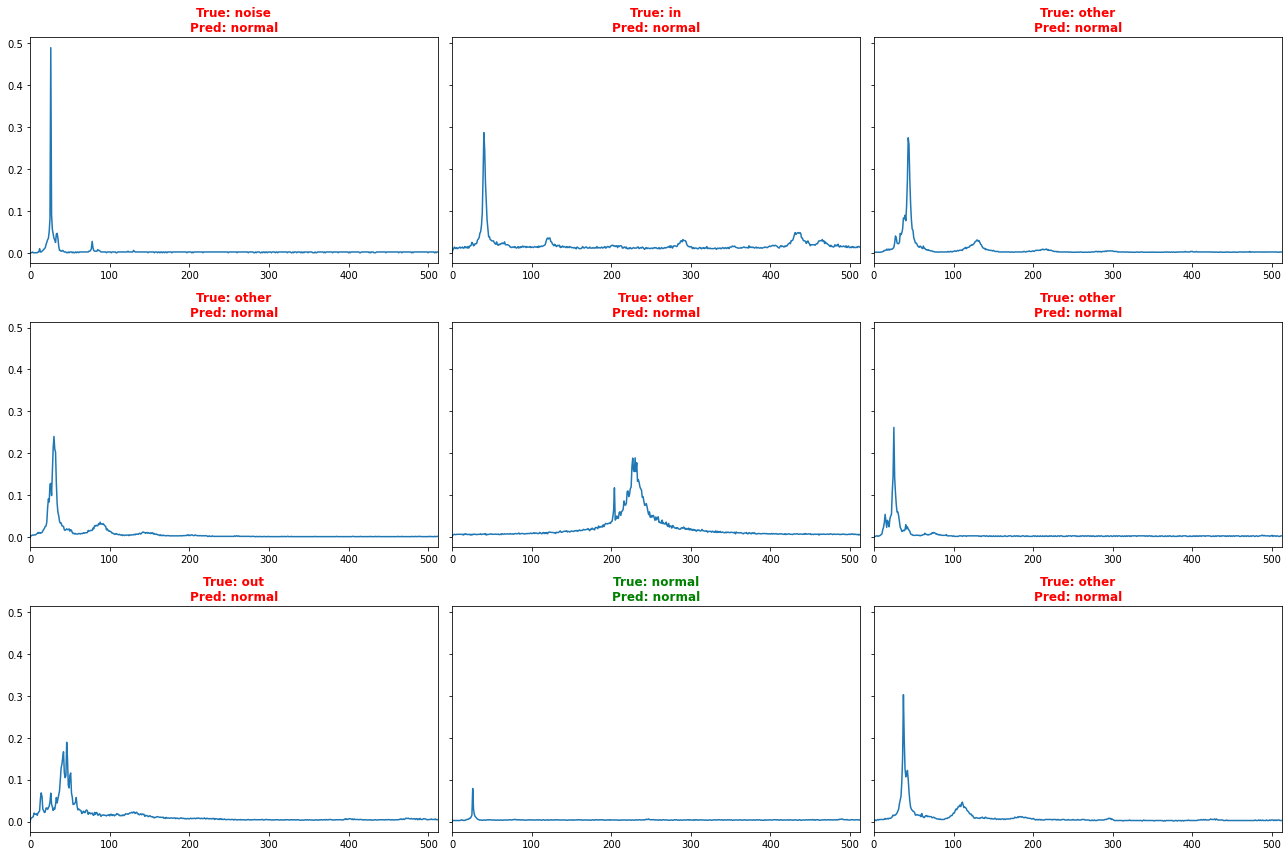

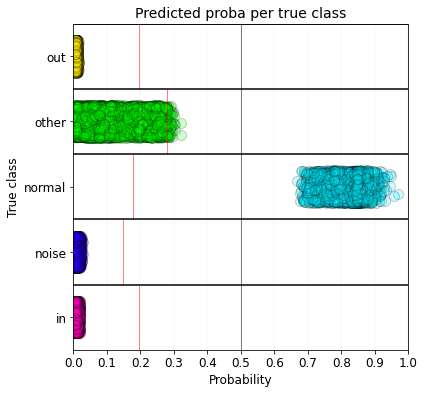

              precision    recall  f1-score   support

          in       0.00      0.00      0.00      3960
       noise       0.00      0.00      0.00      3000
      normal       0.18      1.00      0.30      3600
       other       0.00      0.00      0.00      5600
         out       0.00      0.00      0.00      3960

    accuracy                           0.18     20120
   macro avg       0.04      0.20      0.06     20120
weighted avg       0.03      0.18      0.05     20120



['out' 'in' 'other' 'other' 'other' 'noise' 'normal' 'other' 'other'
 'normal']


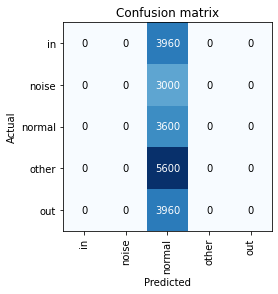

In [19]:
# 전처리한 데이터 X, y 준비 후 #
########### TEMPLATE ############
# splits 생성

#
X, y = norm_X, y
model_name = 'InceptionTimePlus'
method_num = '3'
#
splits = get_splits(y, valid_size=0.2, stratify=True, random_state=42, shuffle=True)
print(f'splits:{splits}')

# prepare dataloaders
tfms = [None, TSClassification()] # TSClassification == Categorize
batch_tfms = TSStandardize()
dls = get_ts_dls(X, y, splits=splits, tfms=tfms, batch_tfms=batch_tfms, bs=[64, 128])
#print(f'dls.dataset:\n{dls.dataset}')
dls.show_batch(sharey=True) # 데이터 그래프로 보여줌
plt.show()

# build learner
model = build_ts_model(InceptionTimePlus, dls=dls) # model
learn = Learner(dls, model, metrics=accuracy)

# learning rate curve
learn.lr_find()

# train
learn = ts_learner(dls, metrics=accuracy, cbs=ShowGraph())
learn.fit_one_cycle(10, lr_max=1e-3)

# 모델 저장
PATH = Path(f'./models/{model_name}_{method_num}.pkl')
PATH.parent.mkdir(parents=True, exist_ok=True)
learn.export(PATH)

# visualize data
learn.show_results(sharey=True)
learn.show_probas()

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.most_confused(min_val=3)
interp.print_classification_report()

# create predictions
PATH = Path(f'./models/{model_name}_{method_num}.pkl')
learn_gpu = load_learner(PATH, cpu=False)
probas, _, preds = learn_gpu.get_X_preds(X[splits[0]])
print(preds[-10:])

## 방법4
- before, after concat한 데이터 전체를 RobustScaling

In [ ]:
import pandas as pd
concat = pd.read_csv('/content/drive/MyDrive/AIBIZ/Data/v23/leaktype_concat_ifft.csv', index_col=0, header=0)
concat_X = concat.drop('leaktype', axis=1)
concat_y = np.array(concat[['leaktype']].leaktype) # y 완료
display(concat_X, concat_y)

In [ ]:
X = np.array(concat_X)
X.shape

In [ ]:
X_1d = X.reshape(1, -1)
X_1d.shape

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler = scaler.fit(X_1d.T)
scaled_X = scaler.transform(X_1d.T).T
#X = to3d(scaled_X) # X 완료
X = scaled_X.reshape((33600, 1026))
X = to3d(X)
X.shape

### oversampled

In [20]:
import pandas as pd
import numpy as np

train = pd.read_csv('/content/drive/MyDrive/AIBIZ/Data/v23/leaktype_train_oversampled.csv', index_col=0, header=0)
X = np.array(train.drop('leaktype', axis=1))
y = np.array(train.leaktype) # y완
print(y[:10])
print(X.shape)
X_1d = X.reshape(1, -1)
print(X_1d.shape)

['out' 'out' 'out' 'out' 'out' 'out' 'out' 'out' 'out' 'out']
(100600, 513)
(1, 51607800)


In [21]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler = scaler.fit(X_1d.T)
normalized_X = scaler.transform(X_1d.T).T
norm_X = normalized_X.reshape((100600, 513))
norm_X = to3d(norm_X) # X완

### before

In [23]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/AIBIZ/Data/v23/leaktype_train.csv')
X = np.array(train.drop('leaktype', axis=1))
y = np.array(train.leaktype) # y완
print(y[:10])
print(X.shape)
X_1d = X.reshape(1, -1)
print(X_1d.shape)

['out' 'out' 'out' 'out' 'out' 'out' 'out' 'out' 'out' 'out']
(33600, 513)
(1, 17236800)


In [24]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler = scaler.fit(X_1d.T)
normalized_X = scaler.transform(X_1d.T).T
norm_X = normalized_X.reshape((33600, 513))
norm_X = to3d(norm_X) # X완

### train

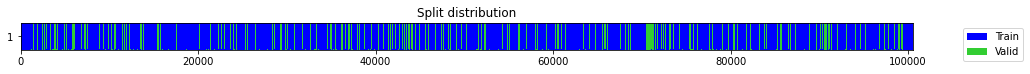

dls.dataset:
(#80480) [(TSTensor(vars:1, len:513, device=cpu, dtype=torch.float32), TensorCategory(2)), (TSTensor(vars:1, len:513, device=cpu, dtype=torch.float32), TensorCategory(3)), (TSTensor(vars:1, len:513, device=cpu, dtype=torch.float32), TensorCategory(4)), (TSTensor(vars:1, len:513, device=cpu, dtype=torch.float32), TensorCategory(4)), (TSTensor(vars:1, len:513, device=cpu, dtype=torch.float32), TensorCategory(0)), (TSTensor(vars:1, len:513, device=cpu, dtype=torch.float32), TensorCategory(4)), (TSTensor(vars:1, len:513, device=cpu, dtype=torch.float32), TensorCategory(0)), (TSTensor(vars:1, len:513, device=cpu, dtype=torch.float32), TensorCategory(1)), (TSTensor(vars:1, len:513, device=cpu, dtype=torch.float32), TensorCategory(0)), (TSTensor(vars:1, len:513, device=cpu, dtype=torch.float32), TensorCategory(3))] ...]


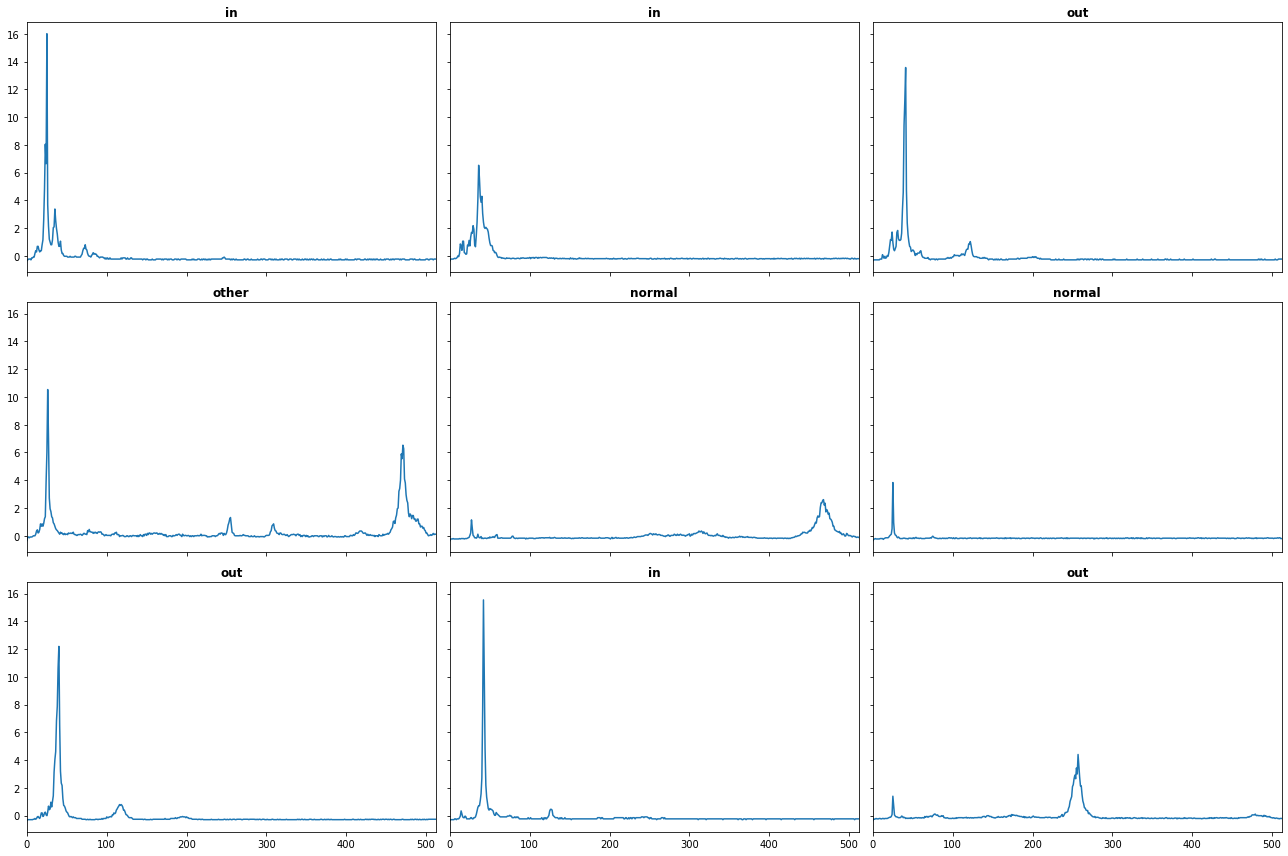

epoch,train_loss,valid_loss,accuracy,time
0,1.088998,1.122391,0.485537,00:52
1,0.979697,1.177967,0.475596,00:52
2,0.719286,0.974688,0.603728,00:52
3,0.515476,0.735440,0.721720,00:52
4,0.322978,0.506890,0.808300,00:52
5,0.184214,0.212771,0.930616,00:52
6,0.093322,0.101876,0.967992,00:52
7,0.046996,0.060944,0.980517,00:52
8,0.026712,0.024052,0.992843,00:52
9,0.016989,0.021415,0.994135,00:53


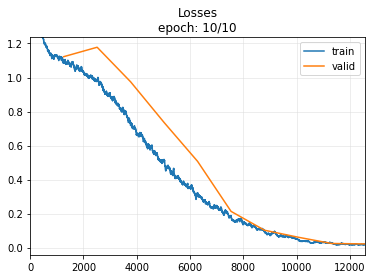

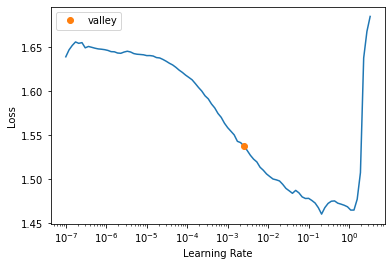

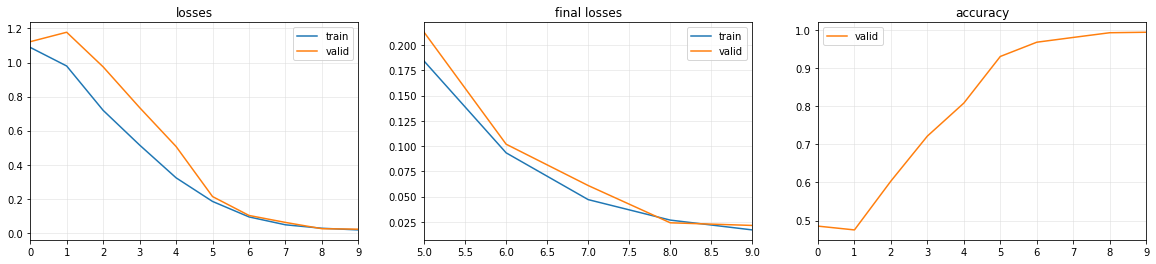

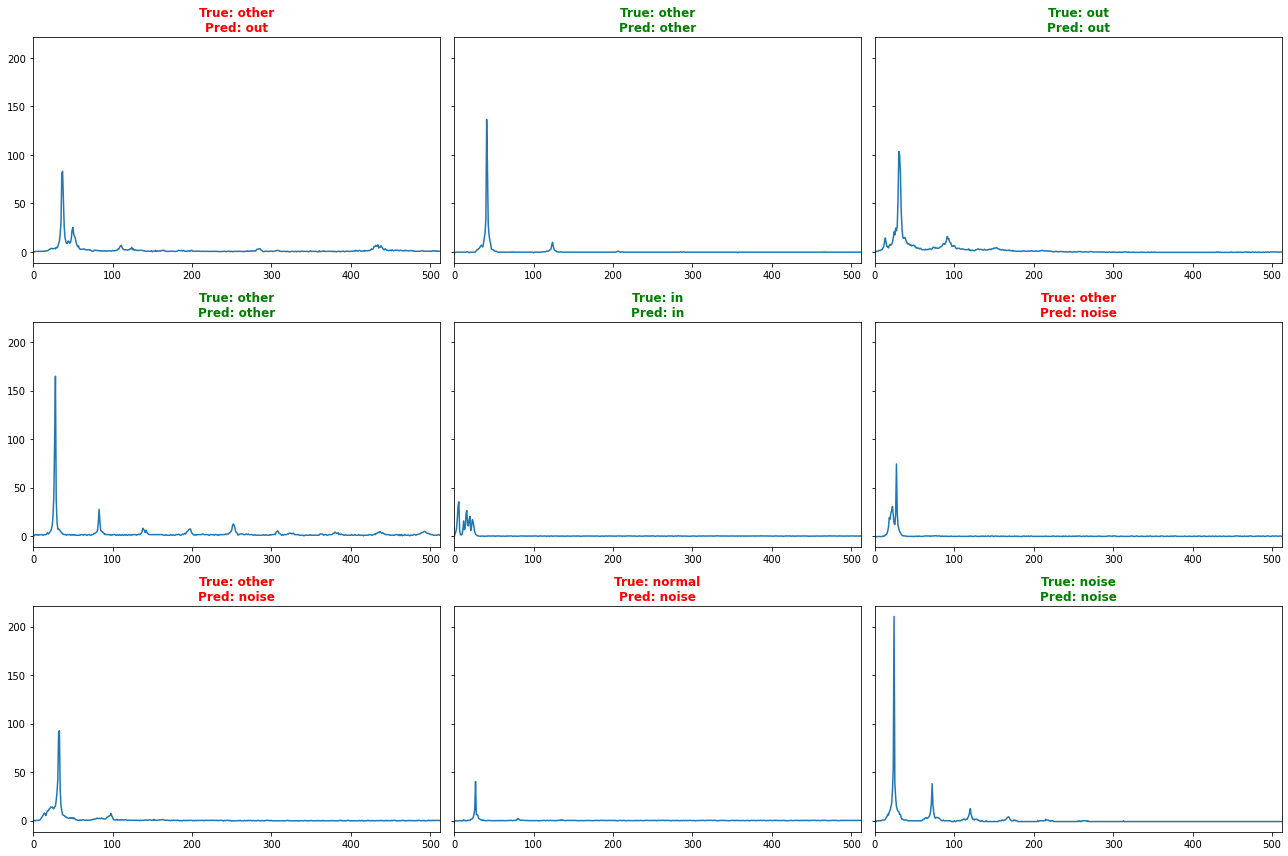

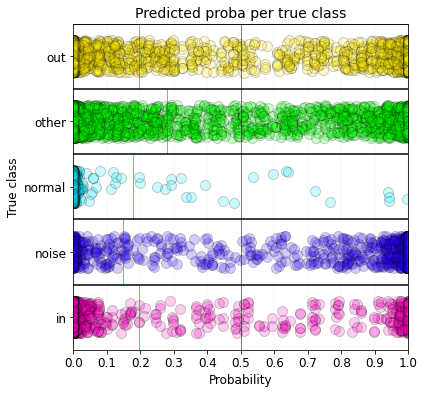

              precision    recall  f1-score   support

          in       0.32      0.06      0.11      3960
       noise       0.24      0.89      0.38      3000
      normal       0.92      0.00      0.01      3600
       other       0.52      0.19      0.28      5600
         out       0.36      0.58      0.45      3960

    accuracy                           0.31     20120
   macro avg       0.47      0.35      0.24     20120
weighted avg       0.48      0.31      0.25     20120



['out' 'in' 'other' 'other' 'other' 'noise' 'normal' 'other' 'other'
 'normal']


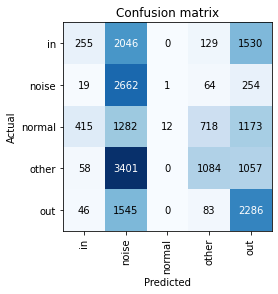

In [22]:
# 전처리한 데이터 X, y 준비 후 #
########### TEMPLATE ############
# splits 생성
X, y = norm_X, y
model_name = 'InceptionTimePlus'
method_num = '4'
splits = get_splits(y, valid_size=0.2, stratify=True, random_state=42, shuffle=True)
#print(f'splits:{splits}')

# prepare dataloaders
tfms = [None, TSClassification()] # TSClassification == Categorize
batch_tfms = TSStandardize()
dls = get_ts_dls(X, y, splits=splits, tfms=tfms, batch_tfms=batch_tfms, bs=[64, 128])
print(f'dls.dataset:\n{dls.dataset}')
dls.show_batch(sharey=True) # 데이터 그래프로 보여줌
plt.show()

# build learner
model = build_ts_model(InceptionTimePlus, dls=dls) # model
learn = Learner(dls, model, metrics=accuracy)

# learning rate curve
learn.lr_find()

# train
learn = ts_learner(dls, metrics=accuracy, cbs=ShowGraph())
learn.fit_one_cycle(10, lr_max=1e-3)

# 모델 저장
PATH = Path(f'./models/{model_name}_{method_num}.pkl')
PATH.parent.mkdir(parents=True, exist_ok=True)
learn.export(PATH)

# visualize data
learn.show_results(sharey=True)
learn.show_probas()

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.most_confused(min_val=3)
interp.print_classification_report()

# create predictions
PATH = Path(f'./models/{model_name}_{method_num}.pkl')
learn_gpu = load_learner(PATH, cpu=False)
probas, _, preds = learn_gpu.get_X_preds(X[splits[0]])
print(preds[-10:])

## 방법5
- Normalizer 사용

In [ ]:
import pandas as pd
concat = pd.read_csv('/content/drive/MyDrive/AIBIZ/Data/v23/leaktype_concat_ifft.csv', index_col=0, header=0)
concat_X = concat.drop('leaktype', axis=1)
concat_y = np.array(concat[['leaktype']].leaktype) # y 완료
display(concat_X, concat_y)

In [ ]:
concat_X = np.array(concat_X)
print(concat_X.shape)
X = concat_X.reshape(1, -1)
print(X.shape)

In [ ]:
X

In [40]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer()
transformer = transformer.fit(X.T)
transformed_X = transformer.transform(X.T).T
#X = to3d(transformed_X) # X 완료

In [ ]:
X = transformed_X.reshape((33600, 1026))
X

In [42]:
X = to3d(X)

### oversampled

In [23]:
import pandas as pd
import numpy as np

train = pd.read_csv('/content/drive/MyDrive/AIBIZ/Data/v23/leaktype_train_oversampled.csv', index_col=0, header=0)
X = np.array(train.drop('leaktype', axis=1))
y = np.array(train.leaktype) # y완
print(y[:10])
print(X.shape)
X_1d = X.reshape(1, -1)
print(X_1d.shape)

['out' 'out' 'out' 'out' 'out' 'out' 'out' 'out' 'out' 'out']
(100600, 513)
(1, 51607800)


In [24]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
scaler = scaler.fit(X_1d.T)

normalized_X = scaler.transform(X_1d.T).T
print(normalized_X)
norm_X = normalized_X.reshape((100600, 513))
norm_X = to3d(norm_X) # X완

[[0. 1. 1. ... 0. 0. 0.]]


### before

In [29]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/AIBIZ/Data/v23/leaktype_train.csv')
X = np.array(train.drop('leaktype', axis=1))
y = np.array(train.leaktype) # y완
print(y[:10])
print(X.shape)
X_1d = X.reshape(1, -1)
print(X_1d.shape)

['out' 'out' 'out' 'out' 'out' 'out' 'out' 'out' 'out' 'out']
(33600, 513)
(1, 17236800)


In [30]:
X_1d

array([[0, 2, 2, ..., 3, 3, 3]])

In [32]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
scaler = scaler.fit(X_1d.T)

normalized_X = scaler.transform(X_1d.T).T
print(normalized_X)
norm_X = normalized_X.reshape((33600, 513))
norm_X = to3d(norm_X) # X완

[[0. 1. 1. ... 1. 1. 1.]]


### train

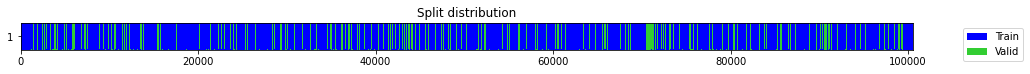

dls.dataset:
(#80480) [(TSTensor(vars:1, len:513, device=cpu, dtype=torch.float32), TensorCategory(2)), (TSTensor(vars:1, len:513, device=cpu, dtype=torch.float32), TensorCategory(3)), (TSTensor(vars:1, len:513, device=cpu, dtype=torch.float32), TensorCategory(4)), (TSTensor(vars:1, len:513, device=cpu, dtype=torch.float32), TensorCategory(4)), (TSTensor(vars:1, len:513, device=cpu, dtype=torch.float32), TensorCategory(0)), (TSTensor(vars:1, len:513, device=cpu, dtype=torch.float32), TensorCategory(4)), (TSTensor(vars:1, len:513, device=cpu, dtype=torch.float32), TensorCategory(0)), (TSTensor(vars:1, len:513, device=cpu, dtype=torch.float32), TensorCategory(1)), (TSTensor(vars:1, len:513, device=cpu, dtype=torch.float32), TensorCategory(0)), (TSTensor(vars:1, len:513, device=cpu, dtype=torch.float32), TensorCategory(3))] ...]


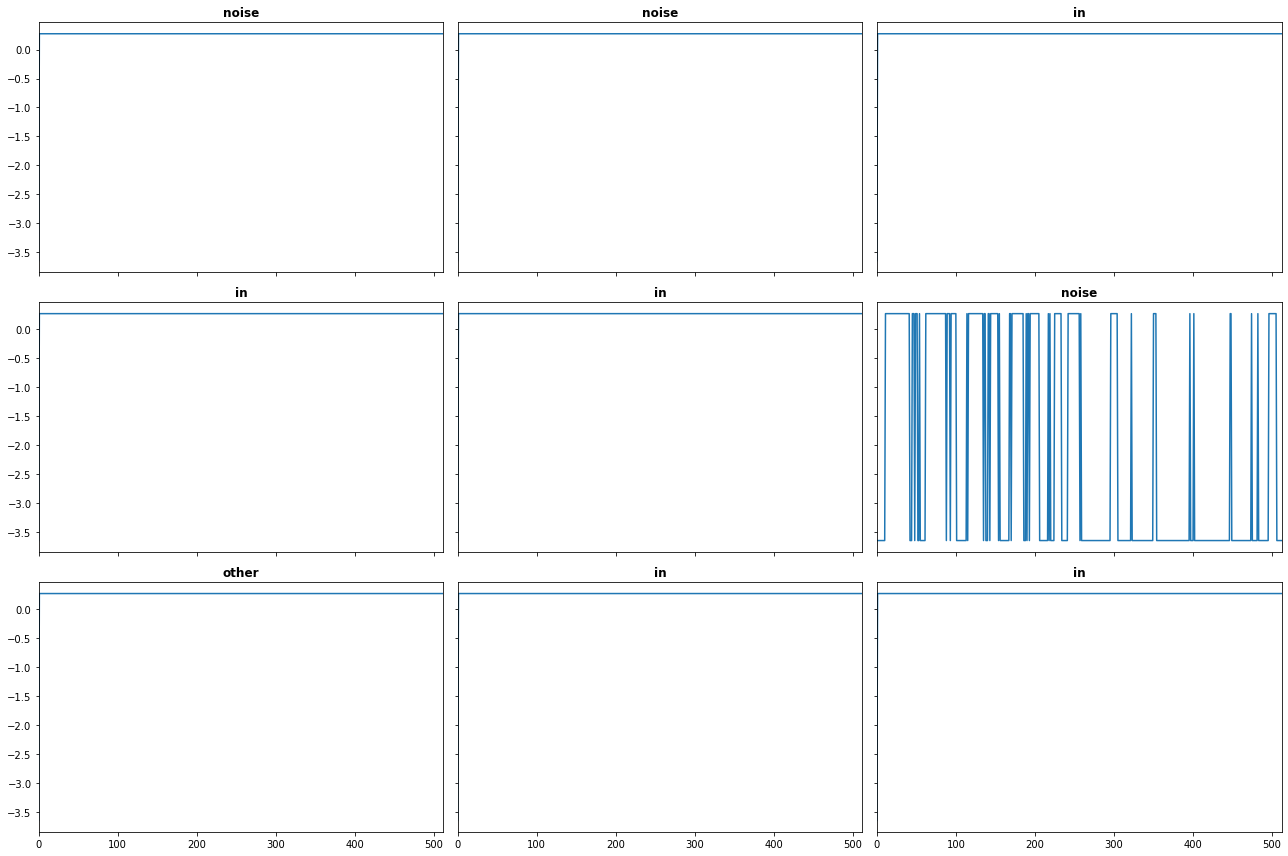

epoch,train_loss,valid_loss,accuracy,time
0,1.528987,1.827834,0.283897,00:53
1,1.520270,1.525411,0.285984,00:52
2,1.522032,1.514180,0.296074,00:52
3,1.494084,1.496593,0.309443,00:53
4,1.494217,1.491856,0.311233,00:53


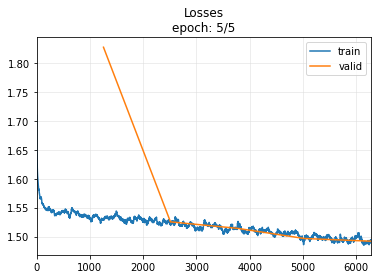

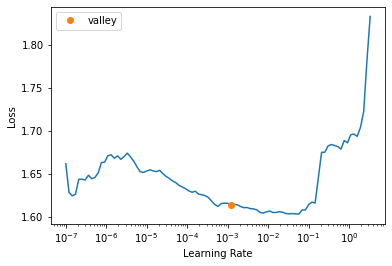

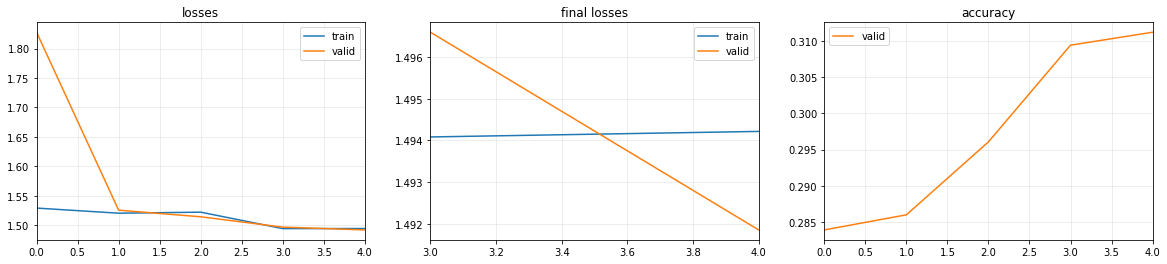

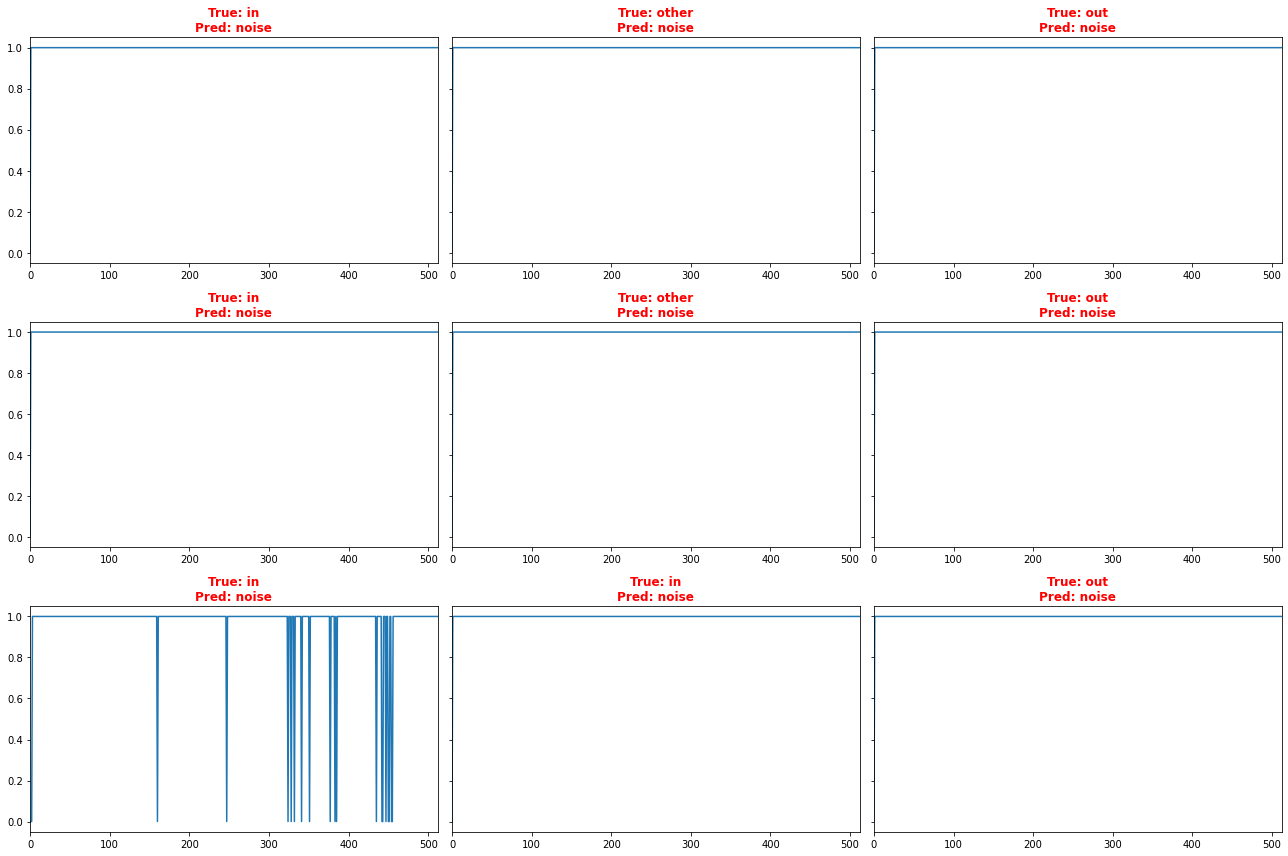

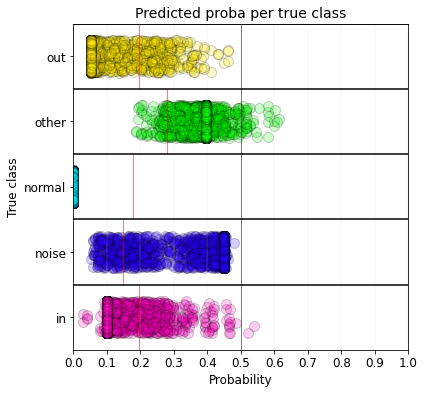

              precision    recall  f1-score   support

          in       0.17      0.02      0.03      3960
       noise       0.14      0.82      0.23      3000
      normal       0.00      0.00      0.00      3600
       other       0.36      0.10      0.15      5600
         out       0.19      0.00      0.01      3960

    accuracy                           0.15     20120
   macro avg       0.17      0.19      0.09     20120
weighted avg       0.19      0.15      0.09     20120



['other' 'other' 'other' 'other' 'noise' 'other' 'other' 'other' 'other'
 'other']


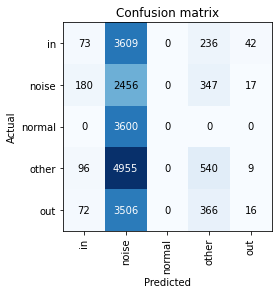

In [25]:
# 전처리한 데이터 X, y 준비 후 #
########### TEMPLATE ############
# splits 생성
X, y = norm_X, y
model_name = 'InceptionTimePlus'
method_num = '5'
splits = get_splits(y, valid_size=0.2, stratify=True, random_state=42, shuffle=True)
#print(f'splits:{splits}')

# prepare dataloaders
tfms = [None, TSClassification()] # TSClassification == Categorize
batch_tfms = TSStandardize()
dls = get_ts_dls(X, y, splits=splits, tfms=tfms, batch_tfms=batch_tfms, bs=[64, 128])
print(f'dls.dataset:\n{dls.dataset}')
dls.show_batch(sharey=True) # 데이터 그래프로 보여줌
plt.show()

# build learner
model = build_ts_model(InceptionTimePlus, dls=dls) # model
learn = Learner(dls, model, metrics=accuracy)

# learning rate curve
learn.lr_find()

# train
learn = ts_learner(dls, metrics=accuracy, cbs=ShowGraph())
learn.fit_one_cycle(5, lr_max=1e-3)

# 모델 저장
PATH = Path(f'./models/{model_name}_{method_num}.pkl')
PATH.parent.mkdir(parents=True, exist_ok=True)
learn.export(PATH)

# visualize data
learn.show_results(sharey=True)
learn.show_probas()

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.most_confused(min_val=3)
interp.print_classification_report()

# create predictions
PATH = Path(f'./models/{model_name}_{method_num}.pkl')
learn_gpu = load_learner(PATH, cpu=False)
probas, _, preds = learn_gpu.get_X_preds(X[splits[0]])
print(preds[-10:])